In [1]:
!pip install labelme tensorflow matplotlib albumentations opencv-python

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [5 lines of output]
  running bdist_wheel
  running build
  running build_ext
  building 'PyQt5.sip' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for PyQt5-sip
ERROR: Could not build wheels for PyQt5-sip, which is required to install pyproject.toml-based projects



     ---------------------------------------- 1.5/1.5 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 6.5/6.5 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 12.1/12.1 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 46.0/46.0 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 6.4/6.4 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 123.2/123.2 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 50.1/50.1 MB 2.0 MB/s eta 0:00:00
     --------

In [1]:
import os
import time
import uuid #unique user identification
import cv2

In [14]:
IMAGES_PATH = os.path.join("data","images")
num_images = 30

In [16]:
cap = cv2.VideoCapture(1)
for imgnum in range(num_images + 1):
    print("Collecting image {}".format(imgnum))
    ret, frame = cap.read()
    # print(frame)
    # imgname = os.path.join(IMAGES_PATH,f"{str(uuid.uuid1())}.jpg")
    # cv2.imwrite(imgname,frame)
    # cv2.imshow("frame",frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1338: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [53]:
!labelme

[INFO   ] __init__:get_config:71 - Loading config file from: C:\Users\Dr.G.Mahadevan\.labelmerc


In [2]:
import tensorflow as tf
import json
from matplotlib import pyplot as plt
import numpy as np

In [58]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg') #you also have a shuffle parameter which is set to true by default

In [59]:
images.as_numpy_iterator().next()

b'data\\images\\f2c13258-93fe-11ee-9c1f-bc542f8c1756.jpg'

In [3]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [61]:
images = images.map(load_image)

In [62]:
images.as_numpy_iterator().next()

array([[[226, 245, 215],
        [227, 247, 219],
        [224, 248, 224],
        ...,
        [159, 162, 169],
        [168, 171, 178],
        [148, 151, 156]],

       [[224, 243, 215],
        [224, 244, 217],
        [221, 245, 221],
        ...,
        [165, 168, 177],
        [161, 164, 171],
        [150, 153, 158]],

       [[222, 242, 215],
        [222, 242, 217],
        [220, 244, 222],
        ...,
        [169, 169, 181],
        [162, 162, 172],
        [157, 157, 165]],

       ...,

       [[224, 219, 225],
        [226, 221, 227],
        [227, 222, 229],
        ...,
        [ 55,  34,  39],
        [ 59,  33,  42],
        [ 63,  36,  43]],

       [[227, 224, 231],
        [225, 222, 229],
        [226, 223, 230],
        ...,
        [ 58,  38,  40],
        [ 59,  36,  42],
        [ 67,  42,  46]],

       [[227, 224, 231],
        [224, 221, 228],
        [225, 222, 229],
        ...,
        [ 57,  37,  39],
        [ 56,  34,  37],
        [ 64,  39,  43]]

In [63]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [64]:
image_generator = images.batch(4).as_numpy_iterator()

In [65]:
plot_images = image_generator.next()

In [3]:
fig, ax = plt.subplots(ncols = 4,figsize=(20,20))

for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

NameError: name 'plt' is not defined

In [67]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)

In [1]:
!pip install albumentations

In [9]:
import albumentations as alb

In [10]:
augmentor = alb.Compose([
                alb.RandomCrop(width=450,height=450),
                alb.RandomBrightnessContrast(p=0.2),
                alb.RandomGamma(p=0.2),
                alb.RGBShift(p=0.2),
                alb.VerticalFlip(p=0.5)],
            bbox_params = alb.BboxParams(format = 'albumentations',
                                         label_fields = ['class_labels']))

In [32]:
img = cv2.imread(os.path.join('data','train','images','2b79ab92-93ff-11ee-b533-bc542f8c1756.jpg'))

In [33]:
with open(os.path.join('data','train','labels','2b79ab92-93ff-11ee-b533-bc542f8c1756.json'),'r') as f:
    label = json.load(f)

In [34]:
label['shapes'][0]['points']

[[300.1675977653631, 135.53072625698323],
 [413.0167597765362, 275.7541899441341]]

In [35]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [36]:
coords

[300.1675977653631, 135.53072625698323, 413.0167597765362, 275.7541899441341]

In [37]:
coords = list(np.divide(coords,[640,480,640,480]))
coords

[0.46901187150837986,
 0.2823556797020484,
 0.6453386871508379,
 0.574487895716946]

In [38]:
augmented = augmentor(image=img,bboxes=[coords],class_labels=['face'])

In [44]:
augmented

{'image': array([[[173, 195, 191],
         [170, 192, 188],
         [177, 199, 195],
         ...,
         [ 66, 111, 130],
         [ 48,  90, 111],
         [ 40,  79, 101]],
 
        [[172, 194, 190],
         [158, 180, 176],
         [161, 183, 179],
         ...,
         [ 62, 100, 120],
         [ 37,  73,  95],
         [ 27,  60,  83]],
 
        [[168, 188, 183],
         [154, 174, 169],
         [154, 177, 171],
         ...,
         [ 51,  80, 103],
         [ 36,  65,  88],
         [ 38,  65,  89]],
 
        ...,
 
        [[217, 255, 237],
         [216, 255, 236],
         [214, 255, 236],
         ...,
         [207, 242, 223],
         [208, 243, 224],
         [208, 244, 222]],
 
        [[219, 255, 237],
         [218, 255, 236],
         [218, 255, 238],
         ...,
         [210, 242, 223],
         [209, 244, 222],
         [208, 243, 220]],
 
        [[222, 255, 238],
         [222, 255, 238],
         [222, 255, 240],
         ...,
         [213, 243,

In [40]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2] , [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:] , [450,450]).astype(int)),
              (255,0,0),2)

array([[[173, 195, 191],
        [170, 192, 188],
        [177, 199, 195],
        ...,
        [ 66, 111, 130],
        [ 48,  90, 111],
        [ 40,  79, 101]],

       [[172, 194, 190],
        [158, 180, 176],
        [161, 183, 179],
        ...,
        [ 62, 100, 120],
        [ 37,  73,  95],
        [ 27,  60,  83]],

       [[168, 188, 183],
        [154, 174, 169],
        [154, 177, 171],
        ...,
        [ 51,  80, 103],
        [ 36,  65,  88],
        [ 38,  65,  89]],

       ...,

       [[217, 255, 237],
        [216, 255, 236],
        [214, 255, 236],
        ...,
        [207, 242, 223],
        [208, 243, 224],
        [208, 244, 222]],

       [[219, 255, 237],
        [218, 255, 236],
        [218, 255, 238],
        ...,
        [210, 242, 223],
        [209, 244, 222],
        [208, 243, 220]],

       [[222, 255, 238],
        [222, 255, 238],
        [222, 255, 240],
        ...,
        [213, 243, 222],
        [215, 245, 224],
        [210, 243, 220]]

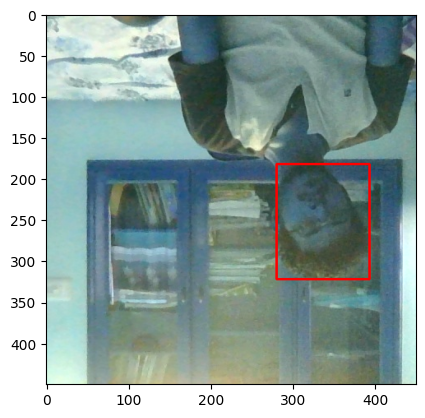

In [41]:
plt.imshow(augmented['image'])

In [46]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type


In [4]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg',shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x,(120,120)))
train_images = train_images.map(lambda x: x/255)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [5]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg',shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x,(120,120)))
test_images = test_images.map(lambda x: x/255)

In [6]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg',shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x,(120,120)))
val_images = val_images.map(lambda x: x/255)

In [7]:
train_images.as_numpy_iterator().next().shape

(120, 120, 3)

In [9]:
test_images.as_numpy_iterator().next()

array([[[0.51617646, 0.547549  , 0.59362745],
        [0.49001226, 0.55079657, 0.6014706 ],
        [0.46911764, 0.5622549 , 0.6019608 ],
        ...,
        [0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ]],

       [[0.52077204, 0.53517157, 0.5857843 ],
        [0.49889705, 0.5469363 , 0.6004902 ],
        [0.47254902, 0.5647059 , 0.6044118 ],
        ...,
        [0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ]],

       [[0.5264706 , 0.54656863, 0.5833333 ],
        [0.49797794, 0.54601717, 0.5925858 ],
        [0.46372548, 0.5593137 , 0.5877451 ],
        ...,
        [0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ]],

       ...,

       [[0.38382354, 0.42303923, 0.45919117],
        [0.3882353 , 0.43039215, 0.47892156],
        [0.36666667, 0

In [10]:
val_images.as_numpy_iterator().next()

array([[[0.3699142 , 0.28866422, 0.28125   ],
        [0.54246324, 0.43970588, 0.41109067],
        [0.5776348 , 0.48517156, 0.44007352],
        ...,
        [0.21881127, 0.1526348 , 0.13841912],
        [0.20018382, 0.13272059, 0.13155638],
        [0.20392157, 0.14656863, 0.13958333]],

       [[0.17990196, 0.14773284, 0.1392157 ],
        [0.49534315, 0.43786764, 0.40900734],
        [0.5598039 , 0.4897059 , 0.45147058],
        ...,
        [0.20588236, 0.1466299 , 0.1583946 ],
        [0.18504901, 0.15612745, 0.13455883],
        [0.14908089, 0.13633579, 0.12506127]],

       [[0.18419118, 0.16648284, 0.17058824],
        [0.41384804, 0.35974264, 0.35343137],
        [0.57438725, 0.5072917 , 0.48112744],
        ...,
        [0.23425245, 0.15245098, 0.18756127],
        [0.34699756, 0.30680147, 0.30379903],
        [0.20128676, 0.2009804 , 0.17052697]],

       ...,

       [[0.6831495 , 0.67971814, 0.71207106],
        [0.67401963, 0.66409314, 0.6924632 ],
        [0.62604165, 0

In [11]:
def load_labels(label_path):
    with open(label_path.numpy(),'r',encoding='utf-8') as f:
        label = json.load(f)
    return [label['class']], label['bbox']

In [12]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*json',shuffle = False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [13]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*json',shuffle = False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [14]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*json',shuffle = False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [14]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2913, 0.3035, 0.527 , 0.5967], dtype=float16))

In [15]:
test_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2128, 0.2396, 0.4722, 0.549 ], dtype=float16))

In [16]:
val_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.287 , 0.449 , 0.5493, 0.7695], dtype=float16))

In [15]:
len(train_images), len(train_labels), len(test_images), len(test_labels),len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

In [16]:
train = tf.data.Dataset.zip((train_images,train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [17]:
test = tf.data.Dataset.zip((test_images,test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [18]:
val = tf.data.Dataset.zip((val_images,val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [19]:
train.as_numpy_iterator().next()

(array([[[[0.9583946 , 1.        , 0.98106617],
          [0.95686275, 1.        , 0.97291666],
          [0.95324755, 1.        , 0.9610907 ],
          ...,
          [0.970098  , 0.997549  , 0.96617645],
          [0.97745097, 0.99785537, 0.9735294 ],
          [0.9976103 , 0.99852943, 0.99558824]],
 
         [[0.96115196, 1.        , 0.9750613 ],
          [0.95343137, 0.99699754, 0.9647059 ],
          [0.9528799 , 1.        , 0.9646446 ],
          ...,
          [0.9769608 , 1.        , 0.972549  ],
          [0.9872549 , 0.9965686 , 0.9759804 ],
          [0.9947917 , 0.9972426 , 0.9943015 ]],
 
         [[0.953125  , 1.        , 0.96096814],
          [0.952451  , 0.9995711 , 0.9607843 ],
          [0.941299  , 0.9961397 , 0.9452206 ],
          ...,
          [0.98039216, 1.        , 0.9755515 ],
          [0.9911765 , 1.        , 0.97990197],
          [0.99607843, 0.99852943, 0.99558824]],
 
         ...,
 
         [[0.89240193, 0.90569854, 0.92009807],
          [0.90612

In [20]:
data_samples = train.as_numpy_iterator()

In [21]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


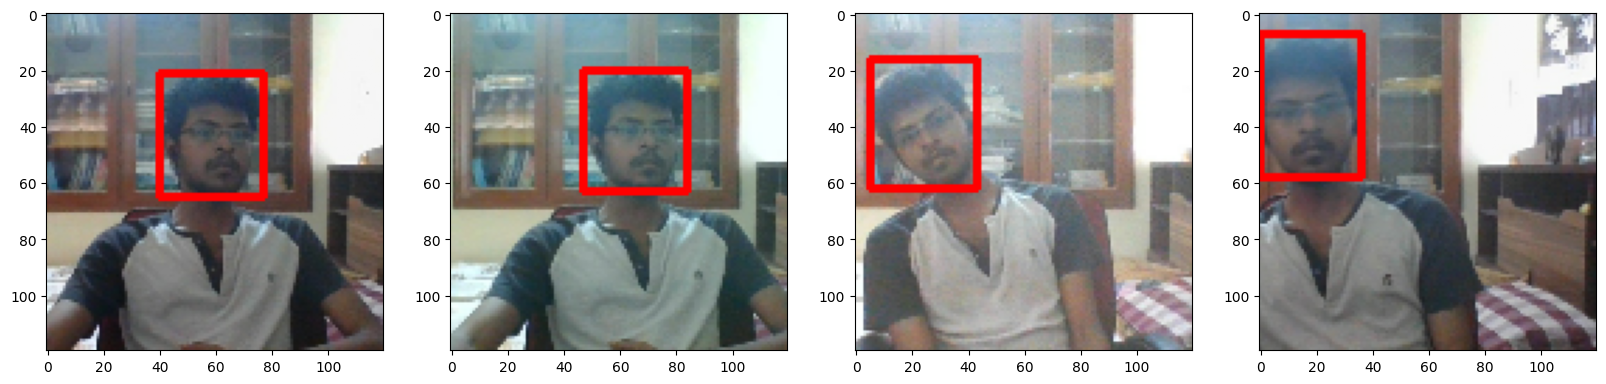

In [22]:
fig,ax = plt.subplots(ncols = 4,figsize=(20,20))
for idx in range(4):
    sample_img = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_img,
                  tuple(np.multiply(sample_coords[:2] , [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:] , [120,120]).astype(int)),
                  (255,0,0),2)
    ax[idx].imshow(sample_img)

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [24]:
vgg = VGG16(include_top = False)

In [25]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [26]:
def build_model():
    input_layer = Input(shape = (120,120,3))
    
    vgg = VGG16(include_top = False)(input_layer)
    
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048,activation='relu')(f1)
    class2 = Dense(1,activation = 'sigmoid')(class1)
    
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048,activation='relu')(f2)
    regress2 = Dense(4,activation = 'sigmoid')(regress1)
    
    facetracker = Model(inputs = input_layer,outputs=[class2,regress2])
    
    return facetracker

In [27]:
facetracker = build_model()

In [28]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [29]:
X,y = train.as_numpy_iterator().next()

In [30]:
classes,coords = facetracker.predict(X)

1/1 [==============================] - 17s 17s/step


In [31]:
classes,coords

(array([[0.46590233],
        [0.42341697],
        [0.46934953],
        [0.4462874 ],
        [0.43527505],
        [0.40925407],
        [0.49034956],
        [0.46617797]], dtype=float32),
 array([[0.63253075, 0.5687775 , 0.47594413, 0.5769782 ],
        [0.70807064, 0.5497118 , 0.43887684, 0.6128365 ],
        [0.6998997 , 0.48632154, 0.42248014, 0.61435527],
        [0.6640388 , 0.5379179 , 0.41083363, 0.5918275 ],
        [0.70396364, 0.5772968 , 0.4047602 , 0.53806436],
        [0.68246615, 0.53416514, 0.48957652, 0.5975041 ],
        [0.6768486 , 0.48565853, 0.5518519 , 0.66140115],
        [0.64119345, 0.55147564, 0.4879046 , 0.6000382 ]], dtype=float32))

In [32]:
batches_per_epoch = len(train)

In [33]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [34]:
def localization_loss(ytrue,yhat):
    delta_coord = tf.reduce_sum(tf.square(ytrue[:,:2] - yhat[:,:2]))
    
    h_true = ytrue[:,3] - ytrue[:,1]
    w_true = ytrue[:,2] - ytrue[:,0]
    
    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    return delta_coord + delta_size

In [35]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [36]:
localization_loss(y[1],coords).numpy()

5.3602552

In [37]:
classloss(y[0],classes).numpy()

0.79842454

In [38]:
regressloss(y[1],coords).numpy()

5.3602552

In [39]:
y[1] , coords

(array([[0.3801 , 0.1743 , 0.684  , 0.588  ],
        [0.309  , 0.5454 , 0.7124 , 1.     ],
        [0.2037 , 0.4248 , 0.4482 , 0.7314 ],
        [0.4326 , 0.4236 , 0.7046 , 0.78   ],
        [0.7793 , 0.00458, 1.     , 0.4614 ],
        [0.4556 , 0.1576 , 0.7856 , 0.571  ],
        [0.05475, 0.03772, 0.3975 , 0.4685 ],
        [0.2356 , 0.1398 , 0.566  , 0.553  ]], dtype=float16),
 array([[0.63253075, 0.5687775 , 0.47594413, 0.5769782 ],
        [0.70807064, 0.5497118 , 0.43887684, 0.6128365 ],
        [0.6998997 , 0.48632154, 0.42248014, 0.61435527],
        [0.6640388 , 0.5379179 , 0.41083363, 0.5918275 ],
        [0.70396364, 0.5772968 , 0.4047602 , 0.53806436],
        [0.68246615, 0.53416514, 0.48957652, 0.5975041 ],
        [0.6768486 , 0.48565853, 0.5518519 , 0.66140115],
        [0.64119345, 0.55147564, 0.4879046 , 0.6000382 ]], dtype=float32))

In [40]:
class FaceTracker(Model):
    def __init__(self,eyetracker,**kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker
    
    def compile(self,opt,classloss,localizationloss,**kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
        
    def train_step(self,batch,**kwargs):
        
        X,y = batch
        
        with tf.GradientTape() as tape:
            classes,coords = self.model(X,training = True)
            
            batch_classloss = self.closs(y[0],classes)
            batch_localizationloss = self.lloss(tf.cast(y[1],tf.float32),coords)
            
            total_loss = batch_localizationloss + 0.5*batch_classloss
            
            grad = tape.gradient(total_loss,self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad,self.model.trainable_variables))
        
        return {"total_loss":total_loss , "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self,batch,**kwargs):
        X,y = batch
        
        classes,coords = self.model(X,training = True)
        
        batch_classloss = self.closs(y[0],classes)
        batch_localizationloss = self.lloss(tf.cast(y[1],tf.float32) , coords)
        total_loss = batch_localizationloss + 0.5*batch_classloss
        
        return {"total_loss":total_loss,"class_loss":batch_classloss,"regress_loss":batch_localizationloss}
    
    def call(self,X,**kwargs):
        return self.model(X,**kwargs)

In [41]:
model = FaceTracker(facetracker)

In [42]:
model.compile(opt,classloss,regressloss)

In [43]:
logdir = 'logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [45]:
history = model.fit(train, epochs = 40, validation_data = val,callbacks=[tensorboard_callback])

Epoch 1/40
473/473 [==============================] - 1896s 4s/step - total_loss: 0.3051 - class_loss: 0.1192 - regress_loss: 0.2456 - val_total_loss: 0.0547 - val_class_loss: 0.0429 - val_regress_loss: 0.0332
Epoch 2/40
473/473 [==============================] - 1903s 4s/step - total_loss: 0.0648 - class_loss: 0.0229 - regress_loss: 0.0533 - val_total_loss: 0.0128 - val_class_loss: 0.0050 - val_regress_loss: 0.0102
Epoch 3/40
473/473 [==============================] - 2142s 4s/step - total_loss: 0.0429 - class_loss: 0.0146 - regress_loss: 0.0356 - val_total_loss: 0.0562 - val_class_loss: 0.0028 - val_regress_loss: 0.0548
Epoch 4/40
473/473 [==============================] - 2274s 5s/step - total_loss: 0.0340 - class_loss: 0.0106 - regress_loss: 0.0288 - val_total_loss: 0.0079 - val_class_loss: 0.0013 - val_regress_loss: 0.0073
Epoch 5/40
473/473 [==============================] - 2138s 4s/step - total_loss: 0.0262 - class_loss: 0.0082 - regress_loss: 0.0221 - val_total_loss: 0.0149 - 

In [46]:
history.history

{'total_loss': [0.02981293573975563,
  0.016235798597335815,
  0.01002610195428133,
  0.014783378690481186,
  0.012413582764565945,
  0.013664246536791325,
  0.006124075036495924,
  0.0059568933211266994,
  0.006027557887136936,
  0.006171582732349634,
  0.0030208283569663763,
  0.003990781493484974,
  0.002917639911174774,
  0.00311842979863286,
  0.006618386134505272,
  0.0039154537953436375,
  0.0016274992376565933,
  0.08531102538108826,
  0.0013680518604815006,
  0.0016546194674447179,
  0.0017339374171569943,
  0.007103069219738245,
  0.002320672618225217,
  0.002064228756353259,
  0.002061408944427967,
  0.002266128547489643,
  0.0023724110797047615,
  0.002205644268542528,
  0.002560525434091687,
  0.0018165858928114176,
  0.00263637350872159,
  0.001387324882671237,
  0.002356892917305231,
  0.0007598992087878287,
  0.000998153816908598,
  0.0011622696183621883,
  0.0012422420550137758,
  0.0011997227557003498,
  0.0010424196952953935,
  0.01875191181898117],
 'class_loss': [0

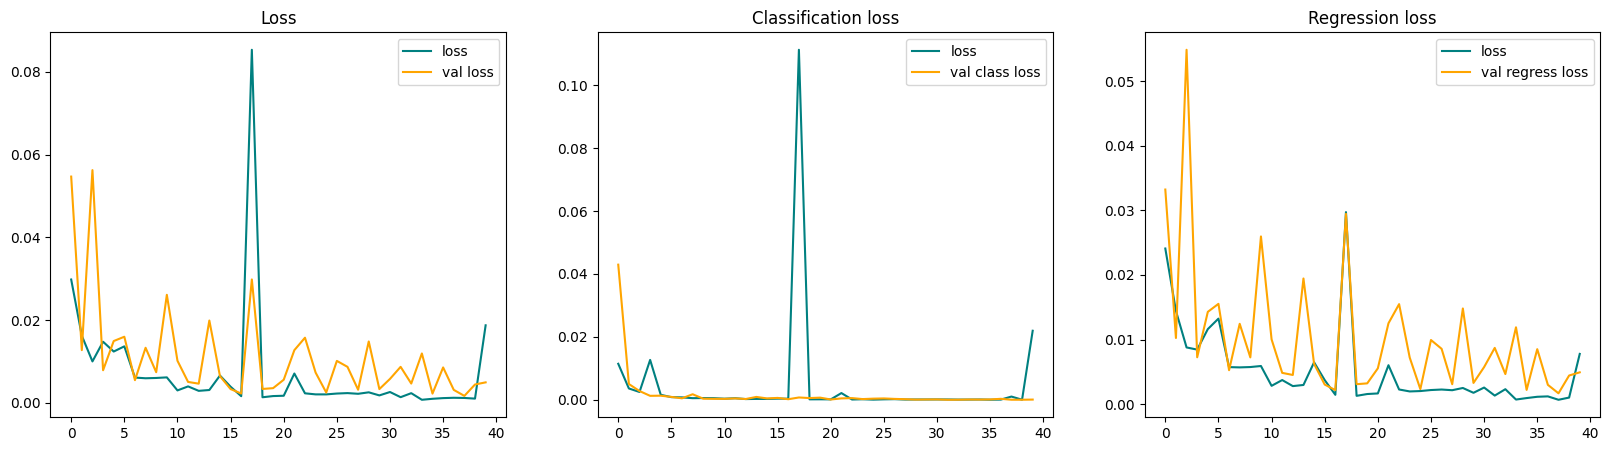

In [49]:
fig, ax = plt.subplots(ncols = 3,figsize=(20,5))

ax[0].plot(history.history['total_loss'],color='teal',label='loss')
ax[0].plot(history.history['val_total_loss'],color='orange',label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history.history['class_loss'],color='teal',label='loss')
ax[1].plot(history.history['val_class_loss'],color='orange',label='val class loss')
ax[1].title.set_text('Classification loss')
ax[1].legend()

ax[2].plot(history.history['regress_loss'],color='teal',label='loss')
ax[2].plot(history.history['val_regress_loss'],color='orange',label='val regress loss')
ax[2].title.set_text('Regression loss')
ax[2].legend()

In [ ]:
from tensorflow.keras.models import load_model
facetracker.save("Face detection model.h5")

NameError: name 'facetracker' is not defined

In [54]:
test_data = test.as_numpy_iterator()

In [73]:
test_sample = test_data.next()

In [74]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


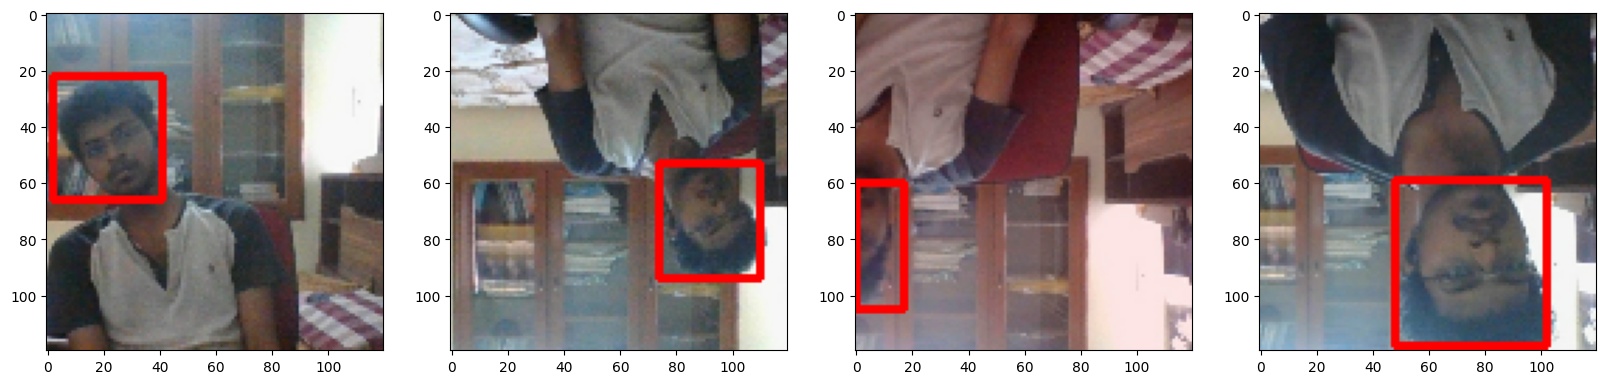

In [75]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [69]:
!pip uninstall opencv-contrib-python

In [70]:
!pip uninstall opencv-contrib-python-headless

In [71]:
!pip uninstall opencv-python

^C


In [55]:
!pip install --upgrade opencv-python

In [2]:
from tensorflow.keras.models import load_model
facetracker = load_model("Face detection model.h5")

In [3]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

1/1 [==============================] - 0s 75ms/step


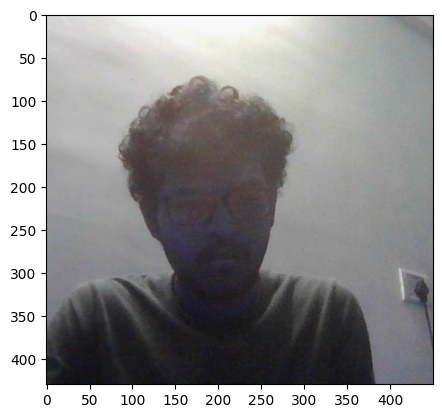

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    # print(frame)
    plt.imshow(frame)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('Image',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [28]:
cap = cv2.VideoCapture(0)